# STA130 HW 06
### Pre-lecture
1.Y = β0 + β1 * X + ϵ
1) Components
* Predictor Variable X (explanatory, independent, or exogenous variable): The independent variable that we use to predict Y.
* Outcome Variable Y (response, dependent, or endogenous variable): The dependent variable, which we want to predict based on X
* Slope coefficient β1: Indicates the change in Y for a one-unit change in X.
* Intercept coefficient β0: A constant term which represents the predicted value of Y when X=0.
* Error term ϵ: The random variation in Y that cannot be explained by X. We assume it follows a normal distribution with a mean of 0 and some variance 𝜎^2, which means errors are centered around 0 with no systematic bias.
2) Combination
* For each observed value of X, the predicted Y value is given by 𝛽0 + 𝛽1 * X. But our actual observed Y will differ from this predicted value due to the error term ϵ. The observed Y values will normally distributed around the predicted values 𝛽0 + 𝛽1 * X with variance 𝜎^2.

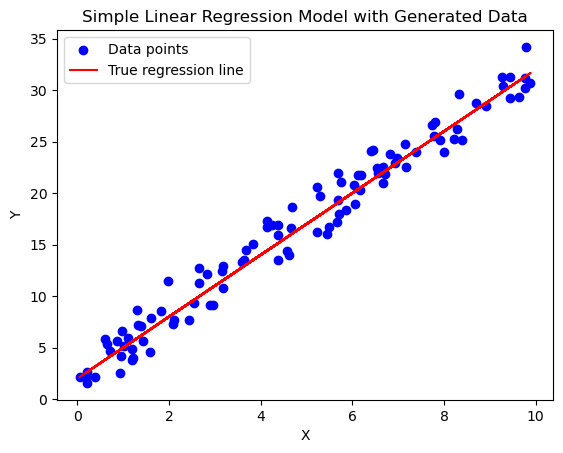

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100        # Sample size
beta0 = 2.0    # Intercept
beta1 = 3.0    # Slope
sigma = 1.5    # Standard deviation of the error term

# Generate X values from a uniform distribution
np.random.seed(0)  # For reproducibility
x = np.random.uniform(0, 10, n)

# Generate errors (normal distribution with mean 0 and standard deviation sigma)
errors = np.random.normal(0, sigma, n)

# Calculate Y values based on the linear model
y = beta0 + beta1 * x + errors

# Plotting
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, beta0 + beta1 * x, color='red', label='True regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression Model with Generated Data')
plt.legend()
plt.show()

In this session, we discussed how to simulate a sample for a simple linear regression model using Python. Starting with parameters for the sample size 𝑛, intercept 𝛽0, slope 𝛽1, and error term's standard deviation 𝜎, we generated predictor values 𝑋 from a uniform distribution and created errors from a normal distribution with mean 0 and standard deviation 𝜎. 
We then computed the dependent variable 𝑌 using the linear regression equation: Y = β0 + β1 * X + error
The code also included a visualization to display the generated data points and the true regression line. This simulation demonstrates how linear regression data can be generated to form a sample that follows a normal distribution for errors, highlighting the underlying linear relationship between 𝑋 and 𝑌 while introducing variability through normally distributed errors.

https://chatgpt.com/c/672d1e4a-076c-800c-a053-3e3465f172fb

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3262.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           4.88e-77
Time:                        20:36:19   Log-Likelihood:                -182.06
No. Observations:                 100   AIC:                             368.1
Df Residuals:                      98   BIC:                             373.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3332      0.290      8.047      0.0

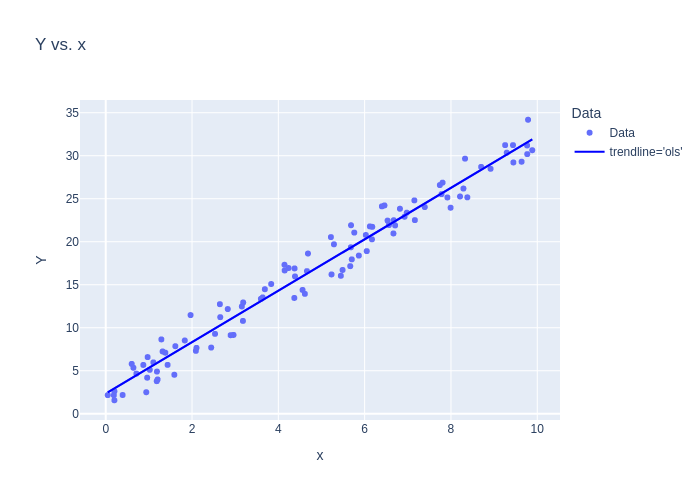

In [3]:
#2.
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # Statsmodels provides statistical models and hypothesis tests
import plotly.express as px  # This is a plotting library

# Step 1: Simulate the data
np.random.seed(0)
n = 100
beta0 = 2.0
beta1 = 3.0
sigma = 1.5

# Generate x and errors
x = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)

# Calculate Y based on the linear model with errors
y = beta0 + beta1 * x + errors

# Step 2: Combine x and y into a DataFrame
df = pd.DataFrame({'x': x, 'Y': y})

# Step 3: Fit a Simple Linear Regression model using statsmodels
# The smf.ols function specifies an Ordinary Least Squares (OLS) regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # Defines the formula Y ~ x for regression
fitted_model = model_data_specification.fit()  # Fits the model to estimate parameters (intercept and slope)

# Step 4: Model Summaries and Output
# fitted_model.summary() provides a summary of the fitted model, including statistical information
print(fitted_model.summary())

# fitted_model.summary().tables[1] specifically provides a table with coefficient estimates
print(fitted_model.summary().tables[1])

# fitted_model.params contains the estimated parameters (intercept and slope)
print(fitted_model.params)

# fitted_model.params.values gives just the parameter values as an array
print(fitted_model.params.values)

# fitted_model.rsquared provides the R-squared value, which measures the fit quality
print("R-squared:", fitted_model.rsquared)

# Step 5: Visualization using Plotly
df['Data'] = 'Data'  # Adding a label column to create a legend for 'Data' points
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Adding trendline manually as a check for `trendline='ols'`
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")  # For GitHub or MarkUs submissions

In this session, we worked through creating and visualizing a fitted simple linear regression model using a simulated dataset. Starting with theoretical values for 𝛽0, 𝛽1, and 𝜎, we generated predictor 𝑋 and response 𝑌 values based on a linear model with normally distributed errors.
Using Python’s statsmodels library, we specified and fitted an Ordinary Least Squares (OLS) model with the formula Y ~ x, allowing us to estimate the intercept and slope. We reviewed key outputs, including:
fitted_model.summary(), which provides a comprehensive statistical summary.
fitted_model.summary().tables[1], showing coefficients with standard errors.
fitted_model.params and fitted_model.params.values, giving the estimated intercept and slope.
fitted_model.rsquared, which reveals the fit quality (variance explained).
Finally, we used plotly.express to create a scatter plot of 𝑌 vs. 𝑋 with an OLS trendline and manually overlaid a custom trendline for comparison. This approach visually confirmed the regression fit, reinforcing our understanding of linear modeling and model diagnostics.

https://chatgpt.com/c/672d1e4a-076c-800c-a053-3e3465f172fb

3.The difference between the nature of the two lines
1) Regression Line: It serves as the baseline that we're assuming underlies the data, which illustrate a perfect linear relationship.
2) The data points reveal how real-world data might deviate from the model due to random errors (becuase it has inherent variability).

In this discussion, we explored the purpose and insights gained from comparing the true regression line to observed data points in a simple linear regression model. We reviewed how plotting both the true regression line (the theoretical line without error) and the observed data points (data with added noise) illustrates key concepts in regression analysis.
This comparison helps:
Assess Model Fit: By examining how closely the observed data aligns with the true line, we get a sense of the fit quality, the variability around the trend, and whether a linear model is suitable.
Understand Data Variability: The distance between data points and the true line reflects real-world data variability, showing how noise affects observations and modeling confidence.
Visualize the Underlying Relationship: Since we rarely know the true parameters, this comparison illustrates the idea of a "true" trend that we aim to estimate, highlighting the role of random errors in observed data.
Overall, this approach provides insights into model assumptions, potential prediction uncertainty, and the quality of the regression fit.

https://chatgpt.com/c/672d1e4a-076c-800c-a053-3e3465f172fb

4.fitted_model.params contains the estimated values of the intercept and slope for the linear regression model. If we're using a simple linear regression model:
* fitted_model.params[0] (often labeled "Intercept") is the estimate of 𝛽0.
* fitted_model.params[1] (often labeled by the variable name of 𝑋) is the estimate of 𝛽1.
The fitted values are calculated using the estimated parameters to predict 𝑌 values based on the observed 𝑋 values.(Using the formula) Also, the fitted values reflect predictions assuming no error—just a straight line based on the estimated intercept and slope.

In this session, we discussed the concept of fitted values in the context of a Simple Linear Regression model. Here's a summary:
Linear Regression Model: The simple linear regression model is defined as y = 𝛽0 + 𝛽1𝑥 + 𝜖, where 𝑦 is the dependent variable, 𝑥 is the independent variable, 𝛽0 is the intercept, 𝛽1 is the slope, and 𝜖 is the error term.
Fitted Model Summary: The regression summary (fitted_model.summary()) includes key statistics like the estimated coefficients for the intercept (𝛽0) and slope (𝛽1).
Fitted Values: Fitted values are the predicted values of 𝑦 based on the observed values of 𝑥 and the estimated coefficients. They are calculated using the equation: 𝑦𝑖 = 𝛽0 + 𝛽1𝑥𝑖
These represent "in-sample predictions" and can be obtained from fitted_model.fittedvalues in Python.
Interpretation: The fitted values reflect what the model predicts for each observation using the estimated coefficients. They are distinct from the theoretical regression line, as they are based on the data used to fit the model.
This process highlights the practical application of regression coefficients in generating predictions from the model.

https://chatgpt.com/c/672d3004-1ec0-800c-a87c-5cd7a69104ac

9.
* Null Hypothesis: There is no relationship between waiting and duration. (The slope of the regression line is 0)
* Alternative Hypothesis: There is a relationship between waiting and duration. (The slope of the regression line is not 0)

If the relationship between waiting and duration in the subset is not significant (p-value > 0.05), but significant for the full dataset (p-value < 0.05), it suggests that longer wait times are contributing more strongly to the relationship between waiting and duration.
If the results are similar (i.e., both the p-value and coefficient are similar across the full and short wait time subsets), this suggests the relationship holds for short wait times as well.

11.
Yi is the duration of the geyser eruption for the 𝑖-th observation. 1["long"] is the indicator variable that takes the value 1 if the waiting time is classified as "long" (waiting >= 68), and 0 otherwise (i.e., short waiting times, waiting < 68).
𝛽 intercept represents the average eruption duration for short wait times (when 1["long"] = 0)
𝛽 contrast represents the difference in duration between long and short wait times, i.e., how much longer the eruption durations are on average for long wait times compared to short wait times.
𝜖 is the error term.

* Previous Models vs. New Model
Previous Models: The relationship between duration and waiting time was assumed to be linear and continuous. The regression coefficient for waiting would tell us how much the duration changes for each unit increase in the waiting time.
New Model: We're using an indicator variable for the kind of waiting time (short or long), turning this into a categorical comparison. This new model treats the relationship between waiting time and eruption duration as a categorical distinction (short vs. long), rather than a continuous relationship.
(The null hypothesis for the new model should be: There is no difference in the average eruption duration between short and long wait times)

Sure! Here's a summary of this session:
Simple Linear Regression and Indicator Variable:
We discussed a simple linear regression model for analyzing the relationship between crop yield and the amount of fertilizer used as well as the Old Faithful Geyser eruption data.
We also explored the idea of introducing an indicator variable (dummy variable) to differentiate the model based on waiting times ("short" vs. "long") in the Old Faithful dataset. This allows for separate regression models for each category of waiting time (short and long), with potentially different intercepts and the same slope for both.
Model Specifications:
Previous Model: Treated waiting time as a continuous variable, assuming the same linear relationship for all waiting times (global model).
Current Model (with Indicator Variable): Used an indicator variable for short and long waiting times, which allows for different intercepts for the two categories but with the same slope for both. This allows the model to capture potential differences in how waiting time affects eruption duration based on the waiting time category.
Big Picture Differences:
The introduction of the indicator variable allows for more flexibility, providing a separate relationship for short and long waiting times. This is a piecewise regression model, whereas the previous model used a global regression that applied the same relationship to all data points.
The new model allows for better fitting when there are distinct patterns for different groups, though it also increases model complexity.
This approach provides a more tailored fit to the data, especially when the relationship between variables is likely to vary across categories.

https://chatgpt.com/c/672d45e0-db5c-800c-a6dd-1bf273c7b78b